In [1]:
from __future__ import division, print_function
from matplotlib import pyplot as plt
%matplotlib inline
import sys
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "4"

In [2]:
import numpy as np

def one_hot_encode_along_channel_axis(sequence):
    #theano dim ordering, uses row axis for one-hot
    to_return = np.zeros((len(sequence),4), dtype=np.int8)
    seq_to_one_hot_fill_in_array(zeros_array=to_return,
                                 sequence=sequence, one_hot_axis=1)
    return to_return

def seq_to_one_hot_fill_in_array(zeros_array, sequence, one_hot_axis):
    assert one_hot_axis==0 or one_hot_axis==1
    if (one_hot_axis==0):
        assert zeros_array.shape[1] == len(sequence)
    elif (one_hot_axis==1): 
        assert zeros_array.shape[0] == len(sequence)
    #will mutate zeros_array
    for (i,char) in enumerate(sequence):
        if (char=="A" or char=="a"):
            char_idx = 0
        elif (char=="C" or char=="c"):
            char_idx = 1
        elif (char=="G" or char=="g"):
            char_idx = 2
        elif (char=="T" or char=="t"):
            char_idx = 3
        elif (char=="N" or char=="n"):
            continue #leave that pos as all 0's
        else:
            raise RuntimeError("Unsupported character: "+str(char))
        if (one_hot_axis==0):
            zeros_array[char_idx,i] = 1
        elif (one_hot_axis==1):
            zeros_array[i,char_idx] = 1

orig_hyp_scores = np.load("hyp_scores_task_0.npy")
fasta_file = "NANOG_summit_train_valid.fa"
fasta_fh = open(fasta_file)

onehot_data = []
for i,line in enumerate(fasta_fh):
    if (i%2 == 1):
        onehot_arr = one_hot_encode_along_channel_axis(line.rstrip())
        onehot_data.append(onehot_arr)
onehot_data = np.array(onehot_data)

In [3]:
contrib_scores = orig_hyp_scores*onehot_data

In [4]:
hyp_scores = orig_hyp_scores - np.mean(orig_hyp_scores,axis=-1)[:,:,None]

In [5]:
hyp_scores.shape

(7564, 1000, 4)

On task task0
Computing windowed sums
Computing threshold
peak(mu)= -0.04471575318649411
Mu: -4.471575e-02 +/- 8.784976e-06
Lablace_b: 0.3086302321866735 and 0.27666957027963957
Thresholds: -4.867688527692109 and 1.2773894161097705
#fdrs pass: 0 and 588853
CDFs: 0.9999998365937429 and 0.9915926018718142
Est. FDRs: 0.639041393303657 and 0.049999611129264855


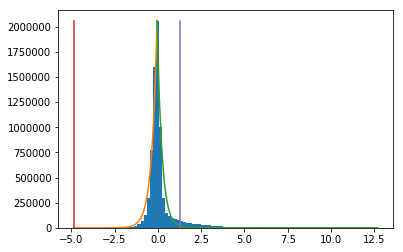

Got 30181 coords
After resolving overlaps, got 30181 seqlets
Across all tasks, the weakest laplace threshold used was: 0.9915926018718142
30181 identified in total
1 activity patterns with support >= 100 out of 3 possible patterns
Metacluster sizes:  [30180]
Idx to activities:  {0: '1'}
On metacluster 0
Metacluster size 30180 limited to 1000
Relevant tasks:  ('task0',)
Relevant signs:  (1,)
(Round 1) num seqlets: 1000
(Round 1) Computing coarse affmat
Beginning embedding computation
Computing embeddings


In [ ]:
from collections import OrderedDict
%matplotlib inline
import modisco
reload(modisco)
import modisco.backend
reload(modisco.backend.theano_backend)
reload(modisco.backend)
import modisco.nearest_neighbors
reload(modisco.nearest_neighbors)
import modisco.affinitymat
reload(modisco.affinitymat.core)
reload(modisco.affinitymat.transformers)
import modisco.tfmodisco_workflow.seqlets_to_patterns
reload(modisco.tfmodisco_workflow.seqlets_to_patterns)
import modisco.tfmodisco_workflow.workflow
reload(modisco.tfmodisco_workflow.workflow)
import modisco.aggregator
reload(modisco.aggregator)
import modisco.cluster
reload(modisco.cluster.core)
reload(modisco.cluster.phenograph.core)
reload(modisco.cluster.phenograph.cluster)
import modisco.core
reload(modisco.core)
import modisco.coordproducers
reload(modisco.coordproducers)
import modisco.metaclusterers
reload(modisco.metaclusterers)

task_to_scores = OrderedDict([('task0', contrib_scores)])
task_to_hyp_scores = OrderedDict([('task0', hyp_scores)])

task_names = ["task0"]

tfmodisco_results = modisco.tfmodisco_workflow.workflow.TfModiscoWorkflow(
                        max_seqlets_per_metacluster=1000)(
                task_names=task_names,
                contrib_scores=task_to_scores,
                hypothetical_contribs=task_to_hyp_scores,
                one_hot=onehot_data)

In [ ]:
modisco

In [ ]:
dir(modisc)